# **Implementación de un algoritmo de ML usando framework**

## **Librerías**

In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score


## **Funciones**

### **Performance**

In [3]:
def performance(X_test, y_test, randomforest):
    y_pred = randomforest.predict(X_test) # predicciones de la clase
    y_proba = randomforest.predict_proba(X_test)[:, 1] # probabilidades de la clase positiva
    
    print("\n>>> REPORTE DE CLASIFICACIÓN: <<<")
    print(classification_report(y_test, y_pred))

    print("\n>>> AUC-ROC:", roc_auc_score(y_test, y_proba), "<<<")

    print("\n>>> MATRIZ DE CONFUSIÓN: <<<")
    c_matrix = confusion_matrix(y_test, y_pred)
    sns.heatmap(c_matrix, annot=True, fmt="d", cmap="magma", xticklabels=['Failed', 'Passed'], yticklabels=['Failed', 'Passed'])

### **Importancia de variables**

In [4]:
def importance(X, randomforest, X_test, y_test):
    perm_importance = permutation_importance(randomforest, X_test, y_test, n_repeats=10, random_state=42)

    importances = pd.Series(perm_importance.importances_mean, index=X.columns)
    importances.nlargest(10).plot(kind="barh", color = 'm')
    plt.title("Permutation Importance")
    plt.show()

### **Grid Search**

In [5]:
def gridSearch(X_train, y_train, randomforest, parameters):
    grid_search = GridSearchCV(
        estimator=randomforest,
        param_grid=parameters,
        scoring="roc_auc",   # puedes cambiar a "f1" según tu objetivo
        cv=5,
        n_jobs=-1,
        verbose=2
    )

    grid_search.fit(X_train, y_train)
    print("\n>>> MEJORES PARÁMETROS: <<<\n", grid_search.best_params_)
    return grid_search

## **Dataset y preprocesamiento**

In [6]:
# Importar datos
data = pd.read_csv('Student_Performance.csv')
data

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0


In [7]:
# Convertir extracurricular activities en binaria
data['Extracurricular Activities'] = data['Extracurricular Activities'].map({'No': 0, 'Yes': 1})
data

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,1,4,2,23.0
9996,7,64,1,8,5,58.0
9997,6,83,1,8,5,74.0
9998,9,97,1,7,0,95.0


### **Ajuste de la variable objetivo**

In [8]:
# Transformar variable objetivo en categórica failed y passed
data['Performance Index'] = ['Passed' if x > 70 else 'Failed' for x in data['Performance Index']]
# Transformar variable objetivo a binario
data['Performance Index'] = [1 if x == 'Passed' else 0 for x in data['Performance Index']]
# Convertir predicciones a enteros
data['Performance Index'] = data['Performance Index'].astype(int)
data

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,1
1,4,82,0,4,2,0
2,8,51,1,7,2,0
3,5,52,1,5,2,0
4,7,75,0,8,5,0
...,...,...,...,...,...,...
9995,1,49,1,4,2,0
9996,7,64,1,8,5,0
9997,6,83,1,8,5,1
9998,9,97,1,7,0,1


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype
---  ------                            --------------  -----
 0   Hours Studied                     10000 non-null  int64
 1   Previous Scores                   10000 non-null  int64
 2   Extracurricular Activities        10000 non-null  int64
 3   Sleep Hours                       10000 non-null  int64
 4   Sample Question Papers Practiced  10000 non-null  int64
 5   Performance Index                 10000 non-null  int64
dtypes: int64(6)
memory usage: 468.9 KB


In [10]:
# Dividir en variables y target
X = data.drop('Performance Index', axis=1)
y = data['Performance Index']
X

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced
0,7,99,1,9,1
1,4,82,0,4,2
2,8,51,1,7,2
3,5,52,1,5,2
4,7,75,0,8,5
...,...,...,...,...,...
9995,1,49,1,4,2
9996,7,64,1,8,5
9997,6,83,1,8,5
9998,9,97,1,7,0


### **Data split**

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [12]:
print("TRAIN SHAPES: X=", X_train.shape, ", y=", y_train.shape,
        "\nTEST SHAPES:  X=", X_test.shape, ", y=", y_test.shape)

TRAIN SHAPES: X= (8000, 5) , y= (8000,) 
TEST SHAPES:  X= (2000, 5) , y= (2000,)


## **Modelo inicial**

In [13]:
rf = RandomForestClassifier(
    n_estimators=20,          # número de árboles
    max_depth=8,              # profundidad máxima (None = hasta que las hojas sean puras)
    min_samples_split=200,    # mínimo de muestras para dividir un nodo
    min_samples_leaf=100,     # mínimo de muestras por hoja
    max_features="sqrt",      # nº de features consideradas en cada split
    bootstrap=True,           # muestreo con reemplazo
    class_weight="balanced",  # útil en caso de desbalance
    random_state=42,          # reproducibilidad
    n_jobs=-1                 # uso de todos los núcleos
)

#### **Entrenamiento**

In [14]:
rf.fit(X_train, y_train)

,n_estimators,20
,criterion,'gini'
,max_depth,8
,min_samples_split,200
,min_samples_leaf,100
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


#### **Evaluación de desempeño**

Evaluación del modelo

Como es clasificación binaria, no basta con accuracy. Usa:

Matriz de confusión

Precision, Recall, F1-score

AUC-ROC (muy recomendable con clases desbalanceadas)

PR AUC si el desbalance es fuerte


>>> REPORTE DE CLASIFICACIÓN: <<<
              precision    recall  f1-score   support

           0       0.99      0.94      0.97      1499
           1       0.85      0.98      0.91       501

    accuracy                           0.95      2000
   macro avg       0.92      0.96      0.94      2000
weighted avg       0.96      0.95      0.95      2000


>>> AUC-ROC: 0.9930465952684358 <<<

>>> MATRIZ DE CONFUSIÓN: <<<


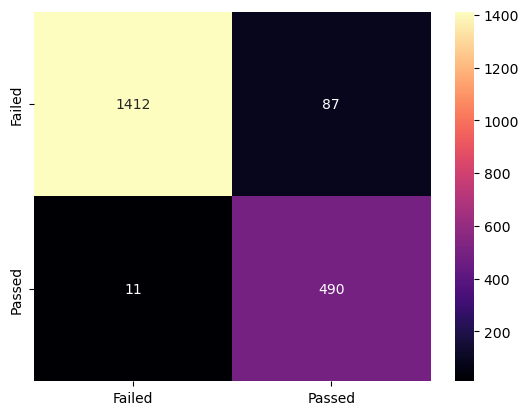

In [15]:
performance(X_test, y_test, rf)

#### **Importancia de variables**

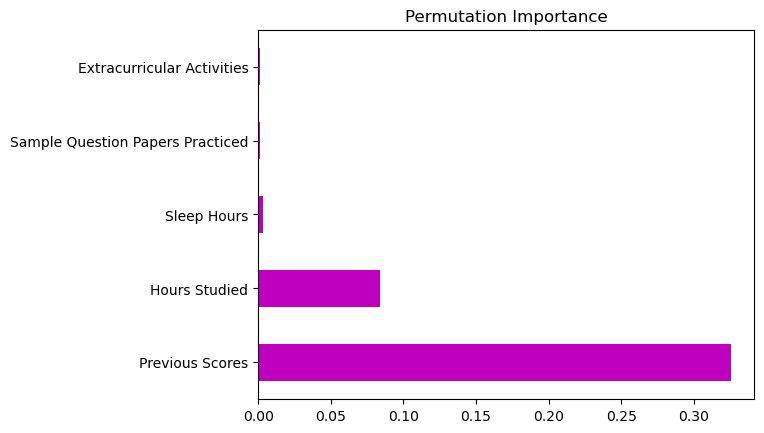

In [16]:
importance(X, rf, X_test, y_test)

## **Modelo mejorado**

### **Optimización de parámetros**

In [17]:
param_grid = {
    "n_estimators": [10, 15, 20, 25, 30, 40],
    "max_depth": [6, 8, 10, 15, 20],
    "min_samples_split": [20, 40, 50, 100, 150, 200],
    "min_samples_leaf": [20, 40, 50, 100],
    "max_features": ["sqrt", "log2"],
}

grid_search_res = gridSearch(X_train, y_train, rf, param_grid)

Fitting 5 folds for each of 1440 candidates, totalling 7200 fits

>>> MEJORES PARÁMETROS: <<<
 {'max_depth': 15, 'max_features': 'sqrt', 'min_samples_leaf': 20, 'min_samples_split': 50, 'n_estimators': 25}


#### **Desempeño**


>>> REPORTE DE CLASIFICACIÓN: <<<
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1499
           1       0.91      0.97      0.94       501

    accuracy                           0.97      2000
   macro avg       0.95      0.97      0.96      2000
weighted avg       0.97      0.97      0.97      2000


>>> AUC-ROC: 0.9963581842319363 <<<

>>> MATRIZ DE CONFUSIÓN: <<<


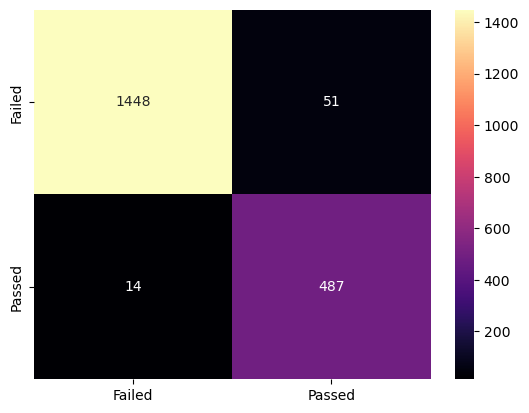

In [18]:
best_rf = grid_search_res.best_estimator_
best_rf.fit(X_train, y_train)

performance(X_test, y_test, best_rf)

#### **Importancia de variables**

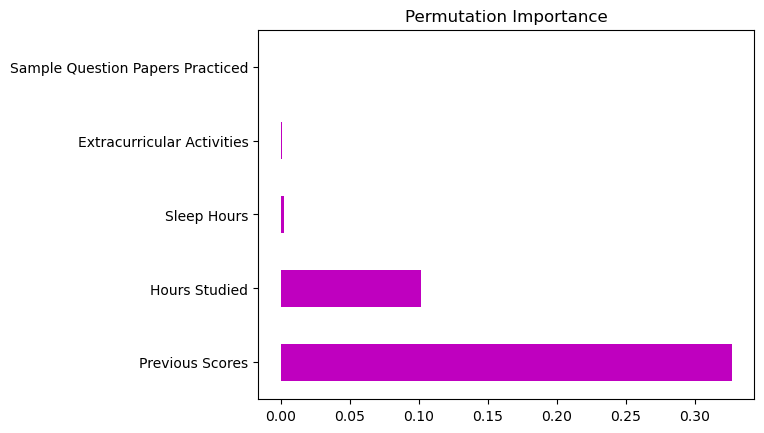

In [19]:
importance(X, best_rf, X_test, y_test)

### **Prueba quitando las variables con poca importancia**

In [ ]:
X_train_new = X_train.drop(['Sample Question Papers Practiced', 'Extracurricular Activities', 'Sleep Hours'], axis =1)
X_test_new = X_test.drop(['Sample Question Papers Practiced', 'Extracurricular Activities', 'Sleep Hours'], axis =1)

X_train_new.head()

,Hours Studied,Previous Scores
8831,2,47
6652,8,59
8276,5,68
46,1,43
5422,1,66



>>> REPORTE DE CLASIFICACIÓN: <<<
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1499
           1       0.91      0.97      0.94       501

    accuracy                           0.97      2000
   macro avg       0.95      0.97      0.96      2000
weighted avg       0.97      0.97      0.97      2000


>>> AUC-ROC: 0.9970232982999977 <<<

>>> MATRIZ DE CONFUSIÓN: <<<


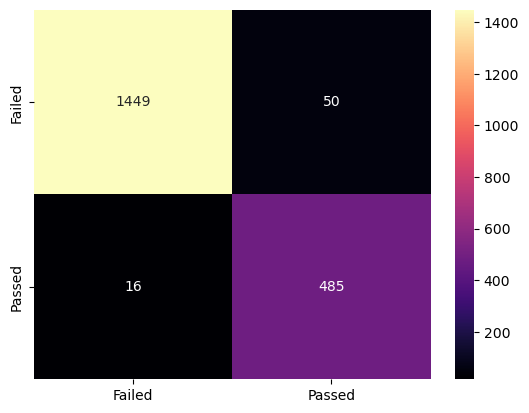

In [21]:
best_rf.fit(X_train_new, y_train)
performance(X_test_new, y_test, best_rf)

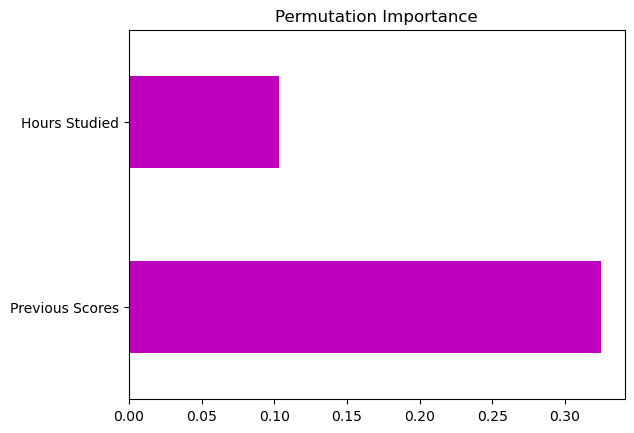

In [23]:
importance(X.drop(['Sample Question Papers Practiced', 'Extracurricular Activities', 'Sleep Hours'], axis =1), best_rf, X_test_new, y_test)